In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load US Beijing Data

bj_data = pd.DataFrame()
for f in os.listdir('/Users/wuyun/work/AQI'):
    if f.endswith('csv'):
        bj_data = bj_data.append(pd.read_csv(f, skiprows=3, encoding='latin_1', parse_dates=[2]), ignore_index=True)

#### 简单处理下数据

In [3]:
# remove missing data
bj_data = bj_data[bj_data['QC Name']=='Valid']

In [4]:
bj_data.head()

,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
0,Beijing,PM2.5,2008-04-08 15:00:00,2008,4,8,15,207,µg/mg³,1 Hr,Valid
1,Beijing,PM2.5,2008-04-08 16:00:00,2008,4,8,16,180,µg/mg³,1 Hr,Valid
2,Beijing,PM2.5,2008-04-08 17:00:00,2008,4,8,17,152,µg/mg³,1 Hr,Valid
3,Beijing,PM2.5,2008-04-08 18:00:00,2008,4,8,18,162,µg/mg³,1 Hr,Valid
4,Beijing,PM2.5,2008-04-08 19:00:00,2008,4,8,19,171,µg/mg³,1 Hr,Valid


### 总体趋势

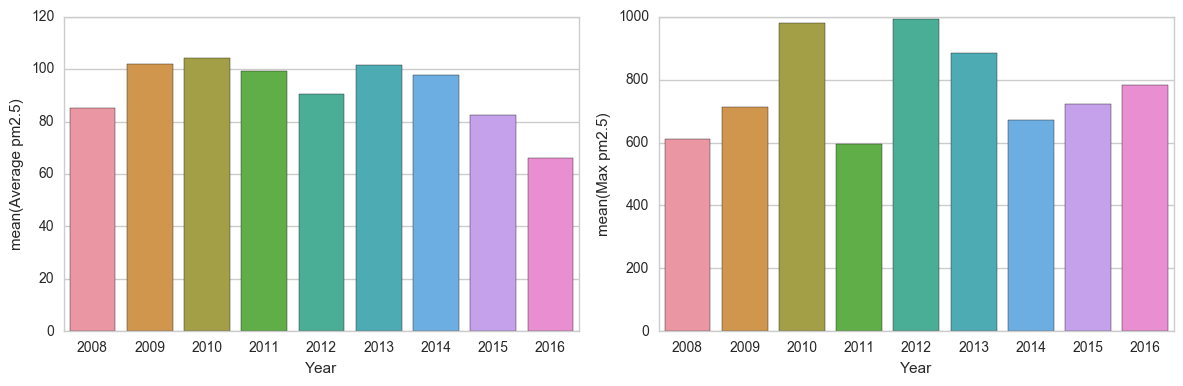

In [6]:
import seaborn as sns
#sns.set(style="white", palette="muted", color_codes=True)

f, (axe1, axe2) = plt.subplots(1,2, figsize=(12, 4), sharex=True)
sns.set_style("whitegrid")

#analisis tendency by year
tend_year = pd.Series(bj_data.groupby(['Year']).mean().Value, name='Average pm2.5')
#analisis tendency by Month
tend_month = pd.Series(bj_data.groupby(['Year']).max().Value, name='Max pm2.5')

sns.barplot(tend_year.index, tend_year, ax=axe1)
sns.barplot(tend_month.index, tend_month, ax=axe2)
#plt.setp(axes, yticks=[])
plt.tight_layout()

### 每月趋势

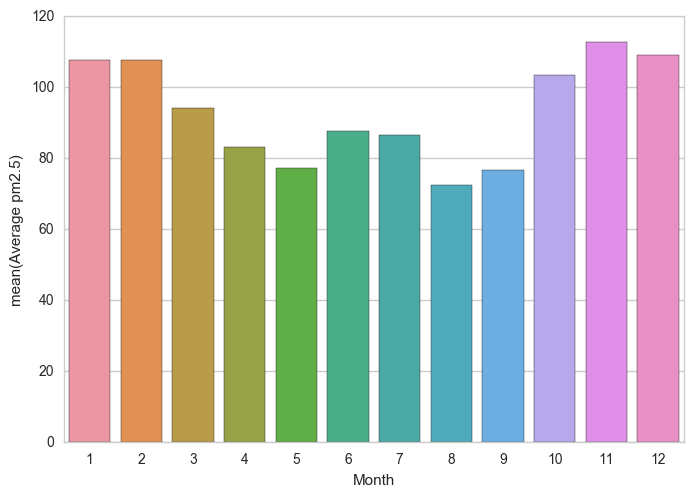

In [7]:
#analisis tendency by month
tend = pd.Series(bj_data.groupby(['Month']).mean().Value, name='Average pm2.5')
sns.barplot(tend.index, tend)

分析2013年

In [8]:
month_day_2013 = bj_data[bj_data.Year==2013].groupby(['Month','Day'])['Value'].mean()

/Users/wuyun/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


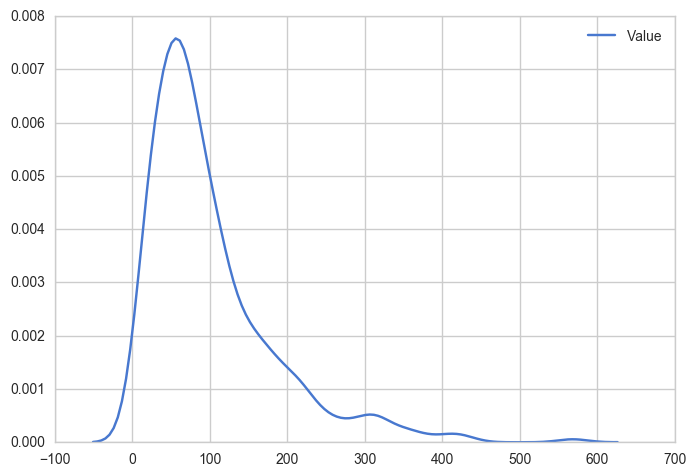

In [9]:
sns.kdeplot(month_day_2013)

In [10]:
# 日均PM大于100占全年比重
month_day_2013[month_day_2013>100].size/month_day_2013.size*1.0

0.3698630136986301

In [28]:
bj_data[bj_data.Year==2016][bj_data.Month==11].sort_values('Value', ascending=False).head()

/Users/wuyun/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,Site,Parameter,Date (LST),Year,Month,Day,Hour,Value,Unit,Duration,QC Name
74349,Beijing,PM2.5,2016-11-25 22:00:00,2016,11,25,22,378,µg/m³,1 Hr,Valid
74359,Beijing,PM2.5,2016-11-26 08:00:00,2016,11,26,8,361,µg/m³,1 Hr,Valid
74358,Beijing,PM2.5,2016-11-26 07:00:00,2016,11,26,7,354,µg/m³,1 Hr,Valid
74355,Beijing,PM2.5,2016-11-26 04:00:00,2016,11,26,4,349,µg/m³,1 Hr,Valid
74356,Beijing,PM2.5,2016-11-26 05:00:00,2016,11,26,5,347,µg/m³,1 Hr,Valid


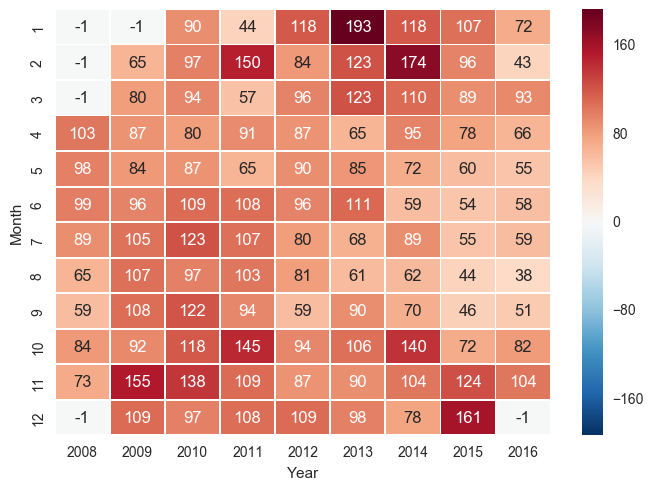

In [79]:
year_month = bj_data.groupby(['Year','Month'])['Value'].mean().astype(int).reset_index()
year_month_data = year_month.pivot("Month", "Year", "Value")
year_month_data = year_month_data.fillna(-1).astype(int)
sns.heatmap(year_month_data, annot=True, fmt="d", linewidths=.5)

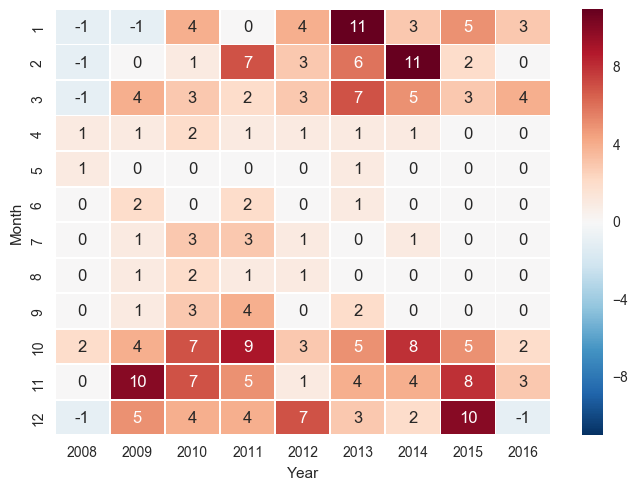

In [75]:
year_month_avg = bj_data.groupby(['Year','Month', 'Day'])['Value'].mean().reset_index()
year_month_avg['flag'] = np.where(year_month_avg.Value>200, 1, 0)
year_month_avg.fillna(0, inplace=True)
year_month_avg = year_month_avg.groupby(['Year','Month'])['flag'].sum().reset_index().astype(int)
map_month = {1:'January', 2:'February'}
#year_month_avg['Month_str'] = year_month_avg['Month'].applymap(map_month.get)
year_month_sum = year_month_avg.pivot("Month", "Year", "flag")
year_month_sum = year_month_sum.fillna(-1).astype(int)
sns.heatmap(year_month_sum, annot=True, fmt="d", linewidths=.5)

In [64]:
map_month = {1:'January', 2:'February'}

In [72]:
year_month_avg.head()

,Year,Month,flag
0,2008,4,1
1,2008,5,1
2,2008,6,0
3,2008,7,0
4,2008,8,0


In [21]:
year_month_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 9 columns):
2008    8 non-null float64
2009    11 non-null float64
2010    12 non-null float64
2011    12 non-null float64
2012    12 non-null float64
2013    12 non-null float64
2014    12 non-null float64
2015    12 non-null float64
2016    11 non-null float64
dtypes: float64(9)
memory usage: 960.0 bytes


In [37]:
year_month_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12 entries, 1 to 12
Data columns (total 9 columns):
2008    8 non-null float64
2009    11 non-null float64
2010    12 non-null float64
2011    12 non-null float64
2012    12 non-null float64
2013    12 non-null float64
2014    12 non-null float64
2015    12 non-null float64
2016    11 non-null float64
dtypes: float64(9)
memory usage: 960.0 bytes
